In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ML models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [13]:
df = pd.read_csv("students_cleaned.csv")  # or students.csv
features = ["comprehension", "attention", "focus", "retention", "engagement_time"]
target = "assessment_score"

In [14]:
X = df[features]
y = df[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [17]:
results = []
for name, model in models.items():
    # Use scaled features for models sensitive to feature scaling
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "Support Vector Regressor"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_score = np.mean(cross_val_score(model, X, y, cv=5))
    results.append({"Model": name, "R²": r2, "RMSE": rmse, "CV Score": cv_score})

In [18]:
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("📊 Model Performance Summary:")
print(results_df)

📊 Model Performance Summary:
                      Model        R²      RMSE  CV Score
0         Linear Regression  0.829028  4.872676  0.817150
1          Ridge Regression  0.829016  4.872856  0.817150
2          Lasso Regression  0.828330  4.882625  0.817144
5         Gradient Boosting  0.812728  5.099673  0.795704
4             Random Forest  0.810583  5.128795  0.787345
7                   XGBoost  0.778496  5.546208  0.749022
6  Support Vector Regressor  0.726916  6.158201  0.762933
3             Decision Tree  0.603047  7.424635  0.588758


/tmp/ipython-input-3470544749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R²", y="Model", palette="viridis")


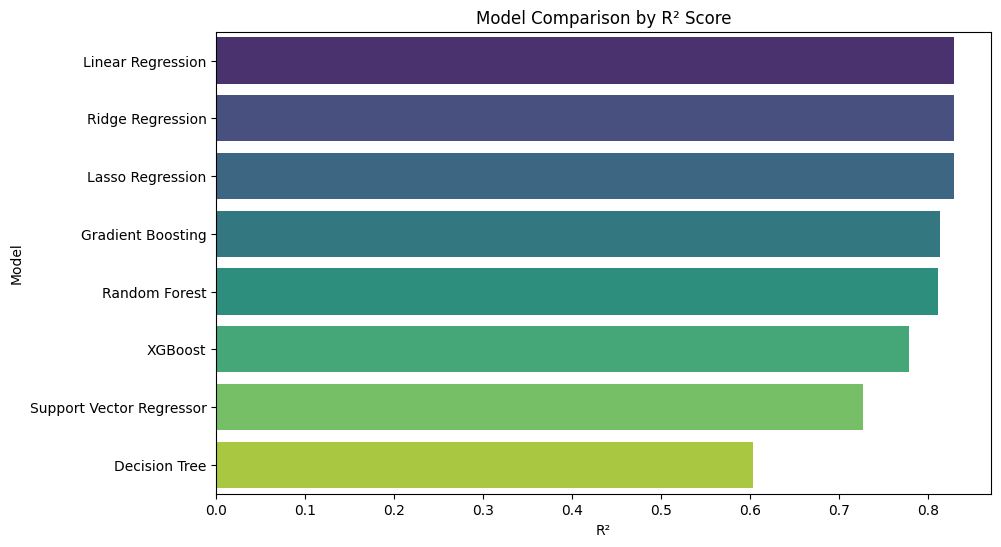

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="R²", y="Model", palette="viridis")
plt.title("Model Comparison by R² Score")
plt.show()


/tmp/ipython-input-1559732673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", palette="magma")


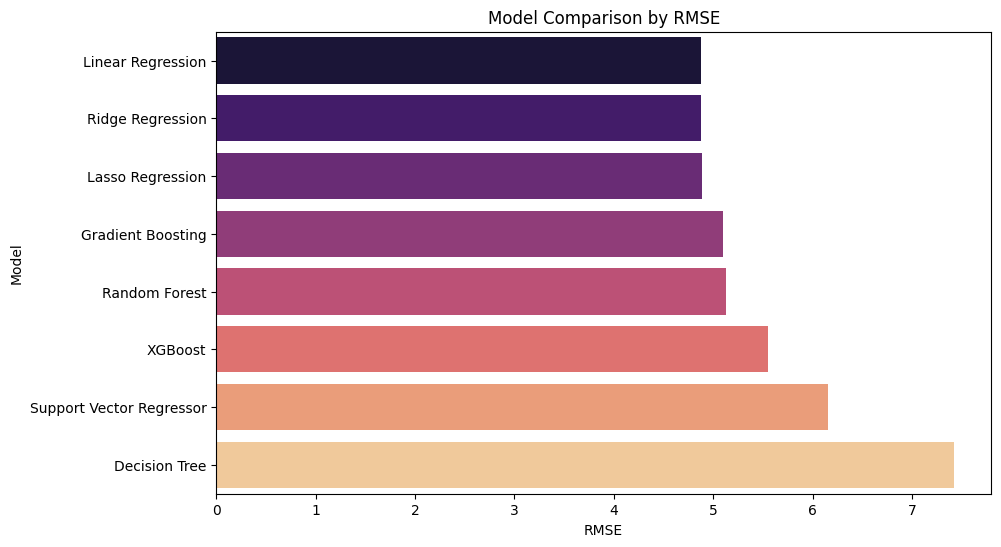

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="RMSE", y="Model", palette="magma")
plt.title("Model Comparison by RMSE")
plt.show()

In [25]:
best_model = results_df.iloc[0]
print(f"🏆 Best Model: {best_model['Model']} (R²: {best_model['R²']:.3f}, RMSE: {best_model['RMSE']:.3f})")

🏆 Best Model: Linear Regression (R²: 0.829, RMSE: 4.873)
